In [9]:
import numpy
# scipy.special for the sigmond function expit()
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [23]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, with and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w21 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # converts inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden later error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0-final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), 
                                        numpy.transpose(inputs))
        
       
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # converts inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [42]:
# number of input, hidden, and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [26]:
numpy.random.rand(3, 3) - 0.5

array([[ 0.18509231, -0.2129151 , -0.12679644],
       [ 0.30175373, -0.42805586,  0.24182573],
       [ 0.45606063,  0.45244096, -0.39798277]])

In [27]:
data_file = open("mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()

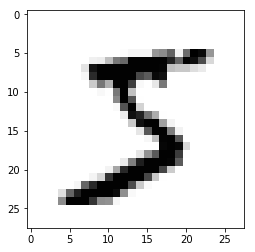

In [28]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [29]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [50]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

print(targets)

[ 0.01  0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01]


In [45]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [47]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    #go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


ValueError: shapes (100,784) and (10,1) not aligned: 784 (dim 1) != 10 (dim 0)

In [36]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [43]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs(
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass


7 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 ne

2 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
4 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 ne

2 correct label
7 network's answer
0 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 ne

2 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 ne

2 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 ne

3 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 ne

7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
3 correct label
7 network's answer
5 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
5 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
8

7 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 ne

7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
9

4 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 ne

7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
0

5 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
3 correct label
7 network's answer
2 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 ne

7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
5

8 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 ne

7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
8

0 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 ne

7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
4 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
3

6 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 ne

7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
8

7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
5 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
9

0 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 ne

7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
3 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
9

8 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 ne

7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
6 correct label
7 network's answer
4 correct label
7 network's answer
2 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
5 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
1

7 network's answer
5 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
4

8 correct label
7 network's answer
3 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 ne

3 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
5 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 ne

7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
1

2 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 network's answer
3 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
2 correct label
7 network's answer
3 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
4 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
7 correct label
7 ne

3 correct label
7 network's answer
5 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
4 correct label
7 network's answer
1 correct label
7 network's answer
5 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
8 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
8 correct label
7 network's answer
5 correct label
7 network's answer
4 correct label
7 network's answer
2 correct label
7 network's answer
0 correct label
7 network's answer
9 correct label
7 ne

7 network's answer
9 correct label
7 network's answer
1 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
6 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
5 correct label
7 network's answer
5 correct label
7 network's answer
8 correct label
7 network's answer
0 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
9

7 network's answer
3 correct label
7 network's answer
3 correct label
7 network's answer
9 correct label
7 network's answer
8 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 network's answer
0 correct label
7 network's answer
0 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
1 correct label
7 network's answer
1 correct label
7 network's answer
3 correct label
7 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
0 correct label
7 network's answer
2 correct label
7 network's answer
0 correct label
7 network's answer
7

9 correct label
7 network's answer
2 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
5 correct label
7 network's answer
6 correct label
7 network's answer
2 correct label
7 network's answer
8 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
7 network's answer
4 correct label
7 network's answer
9 correct label
7 network's answer
9 correct label
7 network's answer
5 correct label
7 network's answer
3 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
7 network's answer
3 correct label
7 network's answer
0 correct label
7 network's answer
4 correct label
7 network's answer
6 correct label
7 network's answer
6 correct label
7 network's answer
1 correct label
7 ne

In [44]:
# calculate the performance score, the fraction of correct answer
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.1028


In [57]:
import numpy
# scipy.special for the sigmond function expit()
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, with and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w21 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # converts inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden later error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0-final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), 
                                        numpy.transpose(inputs))
        
       
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # converts inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
    
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
    
# number of input, hidden, and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01)
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the largest label for this reason
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs(
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answer
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.9435


In [58]:
import scipy.misc
img_array = scipy.misc.imread(image_file_name, flatten=True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * .99) + 0.01

# create rotated variations
# rotated anticolckwise by 10 degrees
inputs_plus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), 10, cval=0.01, reshape=False)
# rotated clockwise by 10 degrees
inputs_minus10_img = scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), -10, cval=0.01, reshape=False)

NameError: name 'image_file_name' is not defined